<h1 align=center style="line-height:150%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#00cc">
عرشیا ربیعی سوال دوم مینی پروژه دوم
</font>
</h1>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
کلاس زیر
    <code>cross validation</code>
    ,
    <code>regression</code>
    ,
    <code>MSE</code>
    زیر را برای هر یک از 9 مدل ذکر شده در صورت سوال محاسبه میکند و درون آبجک نگه میدارد
    </font>
</p>

In [4]:
class Regression:
    def __init__(self , X_train , y_train , number_of_attrs ,exp ,  lamda = 0 ):
        self.X_train = X_train.copy()
        self.y_train = y_train.copy()
        self.weight = np.zeros(number_of_attrs+1)
        self.len = X_train.shape[0]
        self.lamda = lamda
        self.exp = exp
        self.cross_mse = 0
    def train_normal_equation(self, X , y):
        XX_T_lambda_inverse = np.linalg.inv( np.matmul(X.T , X) + (self.lamda * np.eye(X.shape[1])) )
        X_salib = np.matmul(XX_T_lambda_inverse , X.T)
        w = np.matmul(X_salib , y)
        return w
    def cross_validation(self):
        shuffled = np.arange(self.len)
        mse_list = []
        mse_train_list = []
        for i in range(10):
            np.random.shuffle(shuffled)
            self.X_train = self.X_train[shuffled]
            self.y_train = self.y_train[shuffled]
            mses = 0
            mses_train = 0
            for fold in range(2):
                mask = np.ones(self.len , dtype = bool)
                mask[self.len//5 * fold : self.len//5 * (fold+1)] = False
                X_validation = self.X_train[~mask].copy()
                y_validation = self.y_train[~mask].copy()
                X = self.X_train[mask].copy()
                y = self.y_train[mask].copy()
                w = self.train_normal_equation(X , y)
                mse = self.MSE(X_validation , y_validation , w)
                mse_train = self.MSE(X , y , w)
                mses_train += mse_train
                mses += mse
                mse_train_list.append(mses_train)
                mse_list.append(mse)
        plt.boxplot([mse_list , mse_train_list])
        plt.xticks([1,2] , ['Validation datas' , 'Train datas'])
        plt.yscale('log')
        plt.ylabel('MSE')
        plt.show()
        return
    def MSE(self,X , y , W):
        mse = ((y - np.dot(X , W))**2).sum()
        mse /= X.shape[0]
        return mse
    def predict(self , X , W):
        return X.dot(W)

In [5]:
df = pd.read_csv('Dataset/Problem 2/train_set.csv')
df['bias'] = 1
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,target,bias
0,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,24.4,1
1,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.88,12.8,1
2,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34,20.6,1
3,0.05302,0.0,3.41,0.0,0.489,7.079,63.1,3.4145,2.0,270.0,17.8,396.06,5.70,28.7,1
4,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81,25.3,1


### Dividing training Dataset into X and y

In [6]:
target = df['target'].values
df.drop(columns='target' , inplace=True)
x_train = df.values

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در اینجا داده های آموزش را طبق خواسته ی استاندارد سازی میکنیم 
</p>

In [7]:
mean = np.mean(x_train[ : , :-1] ,axis = 0)
std = np.std(x_train[ : , :-1] , axis = 0)
x_train[: , : -1] = (x_train[: , : -1] - mean) / std

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
سه سلول بعدی هر یک به ازای تنظیمات مختلف لامبدا یا همان ضریب منظم سازی برای درجه 1 یا همان رگرسیون خطی داده ها ، مدل را با روش 
<code>cross validation</code>
اموزش میدهیم
و نمودار 
<code>boxplot</code>
آن را رسم میکنیم و در اخر کار برای انتخاب بهترین تنظیمات از بین تنظیمات انجام شده، فاصله ی میان 
    <code>MSE-validation</code>
و
        <code>MSE-train</code>
مقایسه میکنیم آن تنظیماتی که کمترین اختلاف را میان این 2 دارد و خود مقدار
        <code>MSE</code>
   ان کمتر میباشد را به عنوان تنظیمات برتر انتخاب میکنیم
</p>

**Polynomial Degree = 1 and Lambda = 0  :**

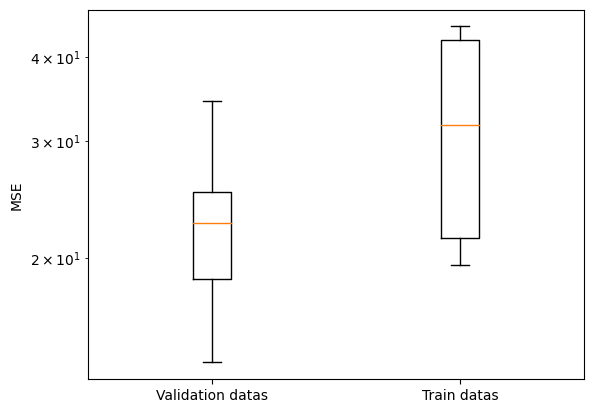

In [8]:
p1l0 = Regression(x_train , target , 13 ,1 ,0)
p1l0.cross_validation()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تحلیل نمودار بالا:
    <br>
    در این حالت 
    <code>validation-MSE</code>
    در حدود 20 میباشد و برای داده ی اموزش در حدود 70 میباشد.این اختلاف به نسبت معقول میباشد اما خود مقدار عددی 
    <code>MSE</code>
    کمی بزرگ است.حال میگردیم در ادامه تنظیمات بهتری پیدا میکنیم یا خیر.
    </br>
</p>

**Polynomial Degree = 1 and Lambda = 1  :**

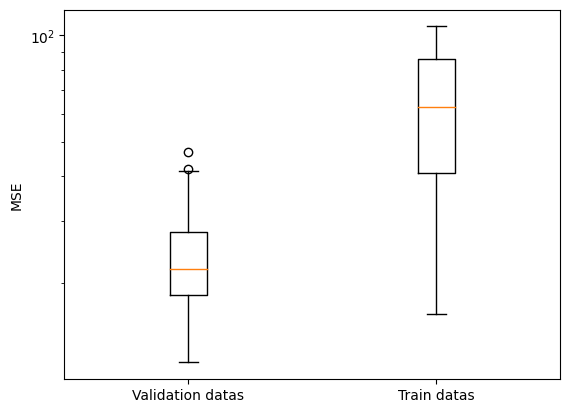

In [422]:
p1l1 = Regression(x_train , target , 13 ,1 , 1)
p1l1.cross_validation()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تحلیل نموداربالا:
    <br>
    با 1 شدن ضریب منظم سازی تفاوت چندانی در مقادیر 
    <code>MSE</code>
    و اختلاف انها بوجود نیامد که منطقی میباشد چرا که مدل ما خطی است و ویژگی ندارد که توجه زیادی به ویژگی پرت بکند
    </br>
</p>

**Polynomial Degree = 1 and Lambda = 10  :**

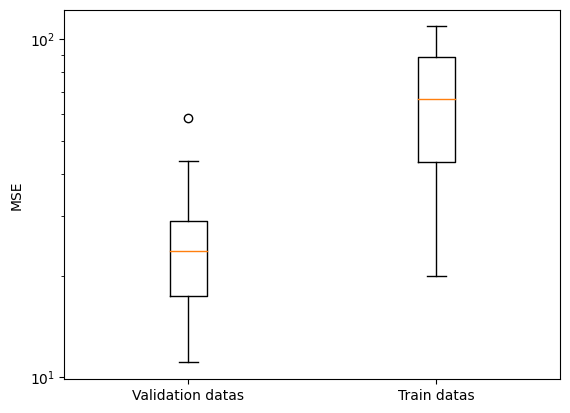

In [423]:
p1l10 = Regression(x_train , target , 13 , 1 ,10)
p1l10.cross_validation()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تحلیل نمودار بالا:
برای این حالت هم مانند دو حالت بالا میباشد.نتیجتا در حالت خطی مقدار ضریب منظم سازی به علت تاثیر درست فیچر ها، تاثیر چندانی در مدل ندارند.
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دو سلول بعدی دو تابع میباشد که کمک میکنند ویژگی با درجه ی دلخواه را استراخ کنیم.
<br>
تابع
    <code>extract_polynomial_features</code>
    یک رکورد دریافت میکند و به ازای درجه ی ورودی در آرگومان تابع، تمامی اعدادی که با فیچر درجه ی داده شده بوجود می آید را میسازد
</br>
   این تابع به صورت بازگشتی پیاده شده است
</p>

In [424]:
constructed_x = []
def extract_polynomial_features(row , degree , it , res = 1, ind=0):
    global constructed_x
    if it == degree+1:
        constructed_x[-1].append(res)
        return
    for i in range(ind , len(row)):
        res *= row[i]
        extract_polynomial_features(row , degree  , it + 1 ,res , i)
        res /= row[i]

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در تابع 
    <code>make_features</code>
یک دیتاست و درجه ای که میخواهیم تمامی فیجر ها تا آن درجه ساخته شود را ورودی میدهیم و درون تابع لیست
    <code>constructed_x</code>
    پر میکنیم که معادل با همان چند جمله ای دیتاست از درجه ی داده شده است.
    چون تابع 
       <code>extract_polynomial_features</code>
        یک سطر را هندل میکند بنابراین در این تابع باید یک حلقه برای طی کردن همه ی سطر ها بزنیم
        همچین تابع 
               <code>extract_polynomial_features</code>
            فیچر ها از درجه ی خواسته شده را فقط تولید میکند در صورتی که فرضا برای فیچر های درجه 3،ویژگی های درجه 2 و 1 هم مورد قبول هست پس یک حلقه ی داخلی نیاز داریم تا ویژگی ها تا آن درجه نیز را هم بسازد.
    <br>
    ناگفته نماند تعداد فیچر های درجه 3 با دیتاست اولیه داده شده برابر با 560 و برای درجه 5 برای با 8568 میباشد
    </br>
</p>

In [425]:
def make_features(X , degrees):
    global constructed_x
    for row in X:
        constructed_x.append([])
        for degree in range(1 , degrees + 1):
            extract_polynomial_features(row , degree , 1 , 1 , 0)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در اینجا از روی دیتای اصلی ، دیتا با ویژگی های درجه 3 را با استفاده از تابع های بالا میسازیم
</p>

In [426]:
constructed_x = []
make_features(x_train[: , :-1] , 3)
for i in range(len(constructed_x)):
    constructed_x[i].append(1)
x3_train = np.array(constructed_x)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال تا 3 سلول آینده مانند حالت خطی، برای درجه ی 3 هم با 3 مقدار مختلف ضریب منظم سازی، نمودار های  
        <code>boxplot</code>
را
رسم میکنیم
</p>

**Polynomial Degree = 3 and Lambda = 0  :**

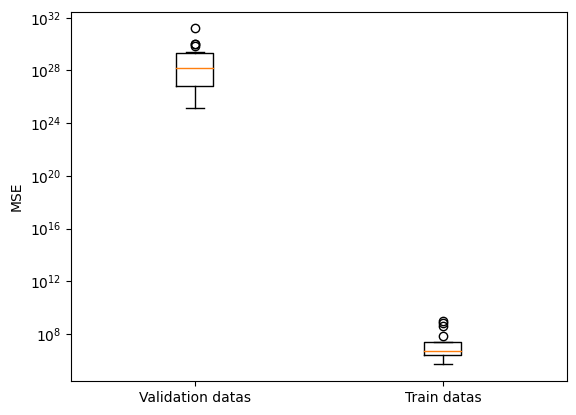

In [442]:
p3l0 = Regression(x3_train , target , 13 ,3 , 0)
p3l0.cross_validation()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تحلیل نمودار بالا:
    <br>
در این حالت تفاوت 
    <code>validation-MSE</code>
    و
    <code>train-MSE</code>
    فاحش است و خود این مقادیر به اندازه ی کافی زیاد هستند که بگوییم
    <code>Underfit</code>
    اتفاق افتاده است.
    این اتفاق بخاطر این است که فیچر هایی تولید شده که مستقل نیستند و همچنین فیچر نا مربوط به تارگت ما میباشند.در ادامه سعی میکنیم با ضریب منظم سازی تاثیر این ویژگی های نا مرتبط را به تعادل برسانیم.
    </br>
</p>

**Polynomial Degree = 3 and Lambda = 1  :**

In [ ]:
p3l1 = Regression(x3_train , target , 13 ,3 , 1)
p3l1.cross_validation()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تحلیل نمودار بالا:
    <br>
در این حالت  
    <code>validation-MSE</code>
    و
    <code>train-MSE</code>
    تفاوت نسبتا زیادی دارند اما خود این مقادیر به وضوح نسبت به حالت قبل کاهش پیدا کرده اند که این نشان میدهد با اضافه کردن ضریب منظم سازی به مدل نرمال تری از درجه 3 رسیدیم. اما باز هم بخاطر آن اختلاف در این حالت نسبتا 
        <code>Overfit</code>
       اتفاق افتاده است
    </br>
</p>

**Polynomial Degree = 3 and Lambda = 10  :**

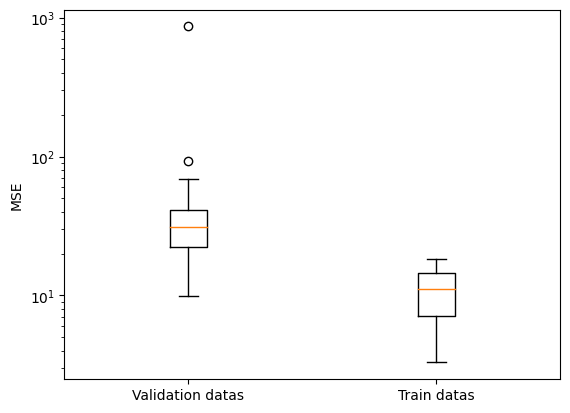

In [429]:
p3l10 = Regression(x3_train , target , 13 ,3 , 10)
p3l10.cross_validation()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تحلیل نمودار بالا:
    <br>
در این حالت  
    <code>validation-MSE</code>
    و
    <code>train-MSE</code>
        تفاوت کمی دارند و خود این مقادیر به اندازه ی قابل قبولی پایین میباشند که این نشان میدهد که مدل میتواند
        <code>Generalization</code>
        خوبی هم داشته باشد و تا به الان بهترین مدل ما با توجه به نمودار است
    </br>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال دیتا با ویژگی های درجه ی 5 را میسازیم
</p>

In [430]:
constructed_x = []
make_features(x_train[: , :-1] , 5)
for i in range(len(constructed_x)):
    constructed_x[i].append(1)
x5_train = np.array(constructed_x)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال تا 3 سلول آینده مانند حالات قبل، برای درجه ی 5 هم با 3 مقدار مختلف ضریب منظم سازی، نمودار های  
        <code>boxplot</code>
را
رسم میکنیم
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
هشدار:3 سلول بعدی برای ران شدن ممکن است هر کدام تا 30 دقیقه تایم بگیرند
</p>

**Polynomial Degree = 5 and Lambda = 0  :**

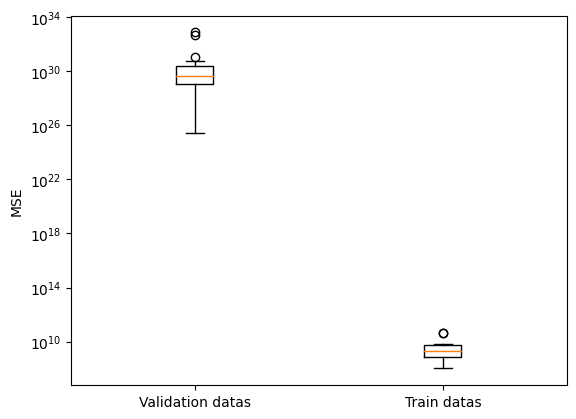

In [ ]:
p5l0 = Regression(x5_train , target , 13 ,5 , 0)
p5l0.cross_validation()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تحلیل نمودار بالا:
    <br>
در این حالت  
    <code>validation-MSE</code>
    و
    <code>train-MSE</code>
    مانند حالت اول درجه 3 تفاوت فاحشی دارند و خود این مقادیر به خودی خود زیاد میباشند که بگوییم 
    <code>Underfit</code>
    اتفاق افتاده است.که دلیل آن را نیز قبلا عرض کرده ام.
    </br>
</p>

**Polynomial Degree = 5 and Lambda = 1  :**

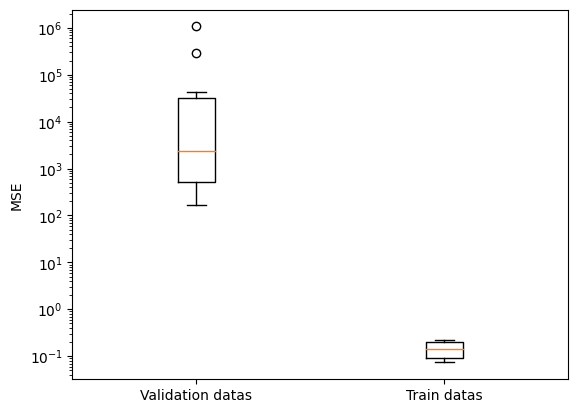

In [434]:
p5l1 = Regression(x5_train , target , 13 ,5 , 1)
p5l1.cross_validation()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تحلیل نمودار بالا:
    <br>
در این حالت مقدار  
    <code>validation-MSE</code>
    بسیار زیاد است
    و مقدار
    <code>train-MSE</code>
بسیار بسیار کم است و این دو تفاوت زیادی باهم دارند. 
در نتیجه این مدل به شدت 
    <code>overfit</code>
    میباشد
    </br>
</p>

**Polynomial Degree = 5 and Lambda = 10  :**

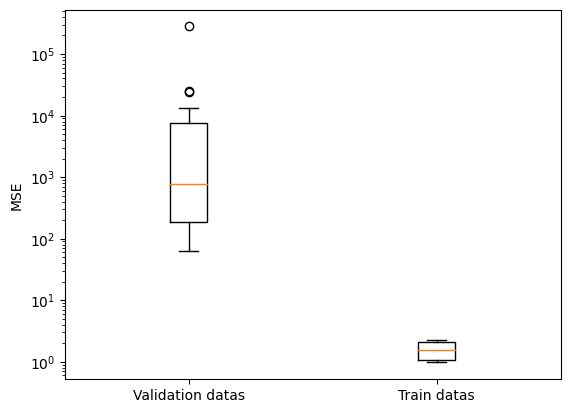

In [435]:
p5l10 = Regression(x5_train , target , 13 ,5 , 10)
p5l10.cross_validation()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تحلیل نمودار بالا:
    <br>
در این حالت مقدار  
    <code>validation-MSE</code>
    بسیار زیاد است
    و مقدار
    <code>train-MSE</code>
بسیار کم است و این دو تفاوت زیادی باهم دارند. این حالت شرایطی مشابه حالت قبل دارد و  
در نتیجه به شدت 
    <code>overfit</code>
    میباشد
    </br>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    حال
    <code>box plot</code>
    9 مدل مختلف را رسم کرده ایم.
    با تحلیل این 9 نمودار متوجه میشویم کمترین اختلاف بین 
    <code>Validation-MSE</code>
    و
        <code>Train-MSE</code>
    
تنظیمات درجه 3 و ضریب منظم سازی 10 دارد
    و خود این مقادیر هم به نسبت بقیه حالات کمتر است بنابراین این تنظیمات را انتخاب میکنیم.
    حال باید این تنظیمات را روی کل داده های اموزش اعمال کرده و سپس 
    <code>train</code>
    کنیم
</p>

**Choosing the best setting:**

In [448]:
best_setting = p3l10
w = best_setting.train_normal_equation(x3_train , target)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال داده ی تست را میخوانیم و آن را با میانگین و انحراف معیار داده های آموزش استاندارد میکنیم
</p>

In [440]:
df_test = pd.read_csv('Dataset/Problem 2/test_set.csv')
df_test['bias'] = 1

In [441]:
x_test = df_test.values
x_test[: , :-1] = (x_test[: , :-1] - mean) / std


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال با استفاده از تابع 
    <code>make_features</code>
ویژگی های درجه 3 داده های تست را استخراج کرده و داده ی حاصل را که در ارایه نامپای
     <code>x3_test</code>
    نگه میداریم
    برای پیشبینی به مدل میدهیم
</p>

In [443]:
constructed_x = []
make_features(x_test[: , :-1] , 3)
for i in range(len(constructed_x)):
    constructed_x[i].append(1)
x3_test = np.array(constructed_x)

In [450]:
prediction = best_setting.predict(x3_test , w)
print(f'the prediction of learned weights from chosen setting is :\n{prediction}')

the prediction of learned weights from chosen setting is :
[17.8114407  25.1561727  35.60691303  9.85172895 17.37327634 26.83699095
 22.66511754 48.39810753 34.53808268 32.94497645 25.05317105 19.55607752
 20.79837134 33.77508507 26.02221879  6.66927364 21.70054675 22.61147778
 34.96379012 15.65297301 22.0315236  23.64313905 24.72770994 14.66926624
 33.22941377 19.942656   18.52814536 30.47177593 15.55671696 36.36907138
 19.23489232 24.24076901 14.46611307 31.2708157  26.87532266 25.90156833
 16.61978808 12.61632957 16.40816596 11.49487294 27.94263016 17.14259837
  9.29610975 22.21656583 37.59045511 23.89817112 18.69728725 15.41437639
 17.00838681 11.78769831 18.05626862 17.21881822 23.57179562 33.57028188
 32.42577256 27.0592687  22.14972405 17.76438614 22.92751779 26.24552294
 19.01736466 22.28534665 10.03720177 24.105172   34.73483516 21.49077295
 29.77385708 38.95268043 45.56824302 -3.83739272 28.06852563 12.27670809
 51.73168611 25.17467255 16.90030328 16.65515576 23.70692797  5.5

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دیتافریم زیر پیشبینی مدل انتخاب شده ی ما را روی داده های تست نشان میدهد
</p>

In [458]:
df_test['predicted']  = prediction
df_test.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,bias,predicted
0,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,1,17.811441
1,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,1,25.156173
2,0.09103,0.0,2.46,0.0,0.488,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82,1,35.606913
3,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79,1,9.851729
4,2.14918,0.0,19.58,0.0,0.871,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79,1,17.373276


In [460]:
df_test['predicted'].to_csv('prediction.csv' , index=False)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بخش 4 سوال دوم:
    <br>
    در حالت کلی باید تنظیمات مختلف را ازمون و خطا کرد یعنی ممکن است تنظیماتی از درجه ی دوم و یک ضریب منظم سازی مشخص، مدل بهتری از مدل انتخابی ما داشته باشد.
    اما چیزی که از روند 9 مدل تست شده میتوان فهمید این است که در درجه 5 و به خصوص در درجه ی 3 با افزایش ضریب منظم سازی به مدل بهتری میرسیم که  
    <code>fit</code>
    تر نسبت به دیتا است
     و ممکن است به تنظیمات بهتری برسیم.
    اما همانطور که گفتم این مورد با سعی و خطا بدست می آید
    </br>
</p>